In [1]:
pip install pandas plotly

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

In [7]:
import pandas as pd
import plotly.express as px

# Load the CSV file
df = pd.read_csv("top_40_gene_coefficients.csv")

# Define pastel colors for the classes
colors = {
    'adeno_carcinoma': '#ffacb7',
    'normal': '#b5ead7'
}

# -----------------------
# Bar Chart
# -----------------------
fig = px.bar(
    df,
    y='samples',
    x='Coefficient',
    orientation='h',
    title="Top 20 Upregulated and Downregulated Genes in Breast Adenocarcinoma",
    color='Class',
    color_discrete_map=colors,
    text='Coefficient',
    height=900
)

# Customize layout
fig.update_layout(
    yaxis_title="Gene",
    xaxis_title="Logistic Regression Coefficient",
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)'
)

# Show the figure
fig.show()


In [6]:
# -----------------------
# Lollipop Chart
# -----------------------
fig = px.scatter(df,
                 x='Coefficient',
                 y='samples',
                 color='Class',
                 color_discrete_map={'adeno_carcinoma': '#ffacb7', 'normal': '#b5ead7'},
                 title="Lollipop Chart: Gene Influence on Classification",
                 labels={'samples': 'Gene'},
                 size=[0.2]*len(df),
                 height=900)

fig.update_traces(mode='markers+lines',
                  line=dict(color='gray'),
                  marker=dict(size=10))
fig.update_layout(yaxis=dict(categoryorder='total ascending'),
                  showlegend=True)
fig.show()

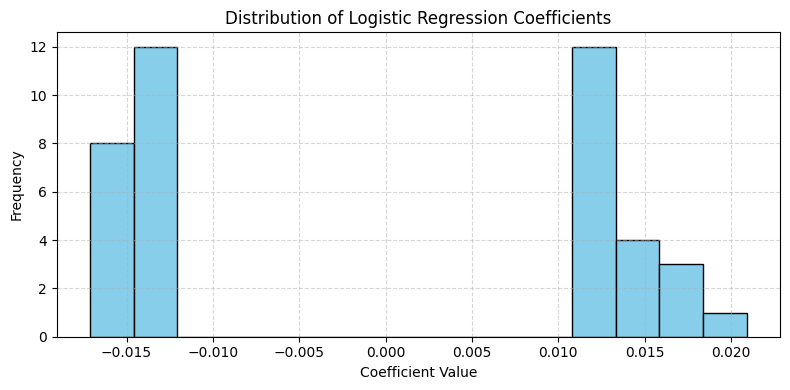

In [4]:
# -----------------------
# Histogram of Coefficients
# -----------------------
plt.figure(figsize=(8, 4))
plt.hist(df['Coefficient'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

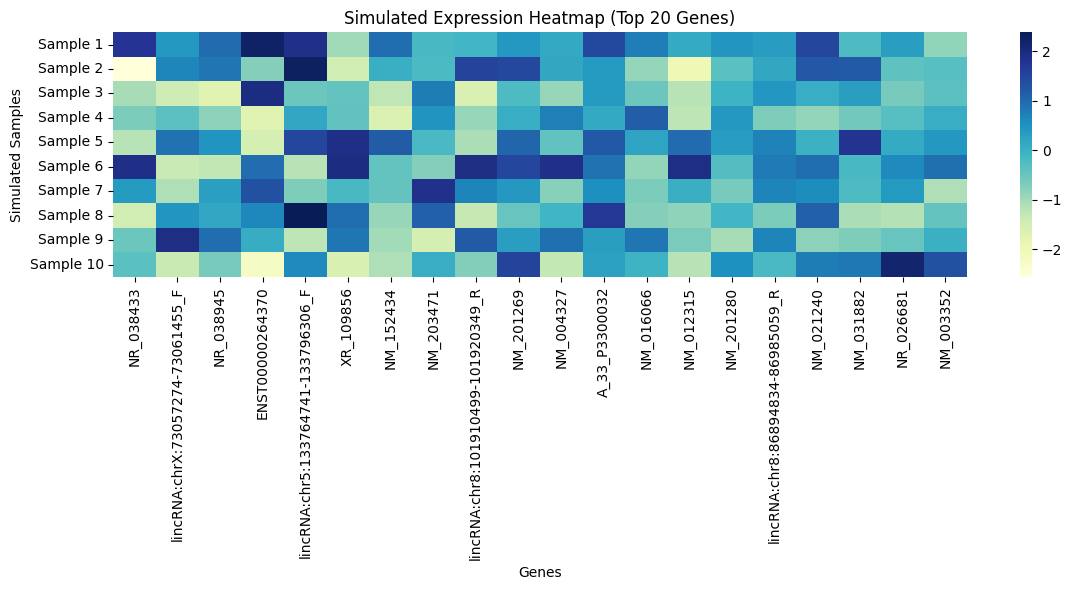

In [5]:
# -----------------------
# Simulated Heatmap for Top 20 Genes
# -----------------------
top20_genes = df.head(20)['samples'].tolist()
np.random.seed(0)
simulated_expression = np.random.randn(10, 20)  # 10 samples × 20 genes

plt.figure(figsize=(12, 6))
sns.heatmap(simulated_expression, cmap="YlGnBu",
            xticklabels=top20_genes,
            yticklabels=[f"Sample {i+1}" for i in range(10)])
plt.title("Simulated Expression Heatmap (Top 20 Genes)")
plt.xlabel("Genes")
plt.ylabel("Simulated Samples")
plt.tight_layout()
plt.show()

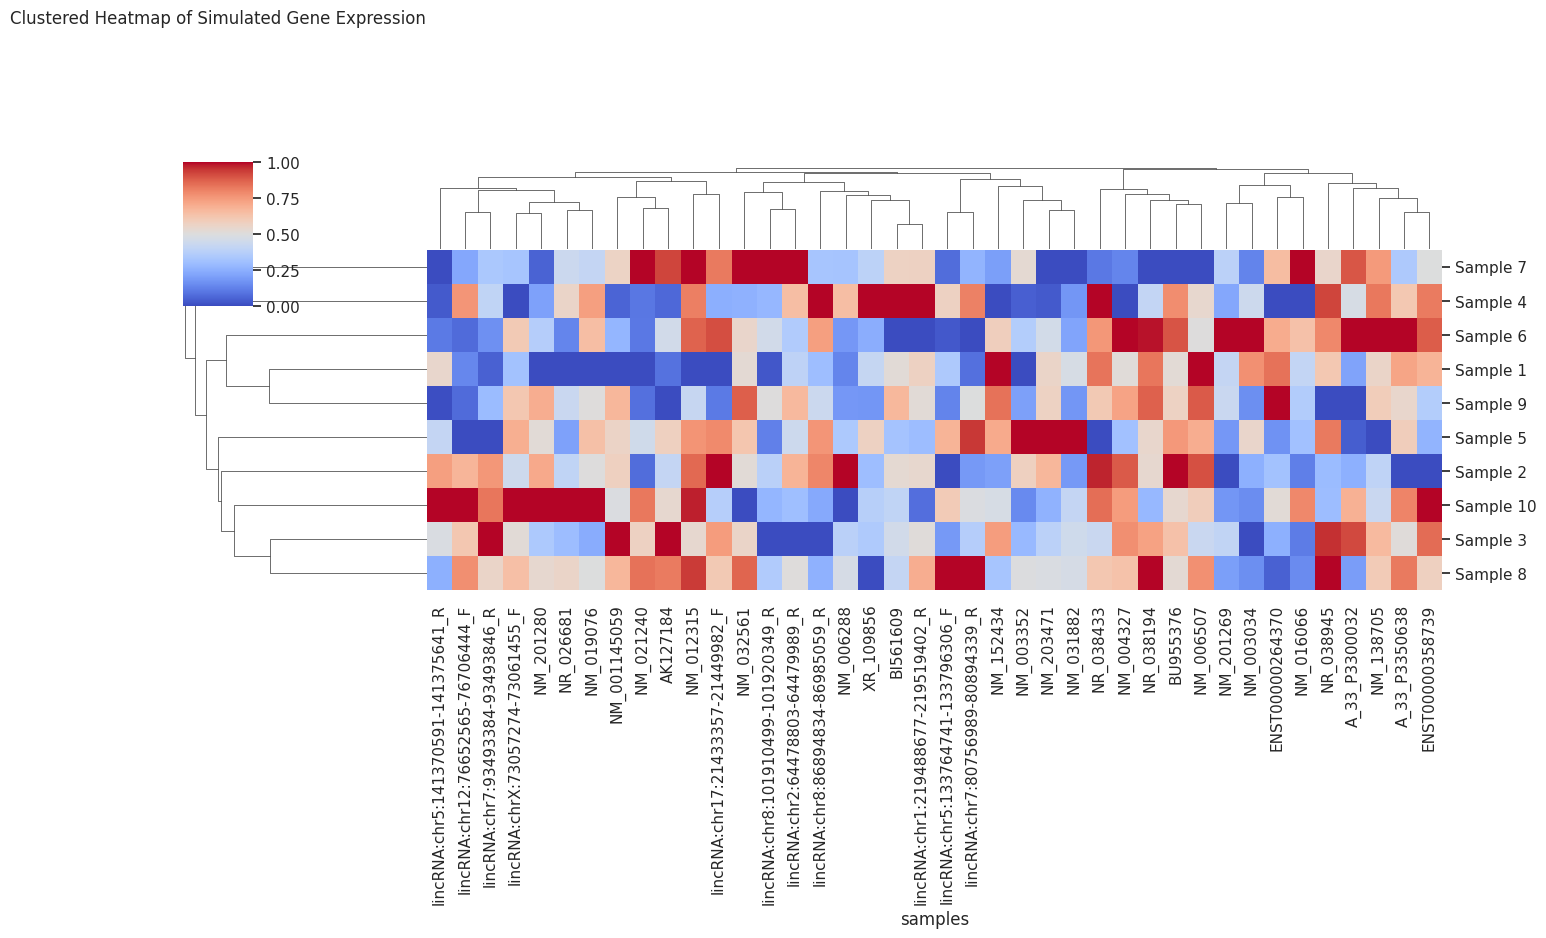

In [17]:
np.random.seed(42)
simulated_expression = np.random.randn(10, len(df['samples']))  # 10 samples × 40 genes
expression_df = pd.DataFrame(simulated_expression, columns=df['samples'])
expression_df.index = [f"Sample {i+1}" for i in range(10)]

# Plot clustered heatmap
sns.set(style="whitegrid")
g = sns.clustermap(expression_df, cmap="coolwarm", standard_scale=1, figsize=(14, 8))
plt.title("Clustered Heatmap of Simulated Gene Expression", pad=100)
plt.show()

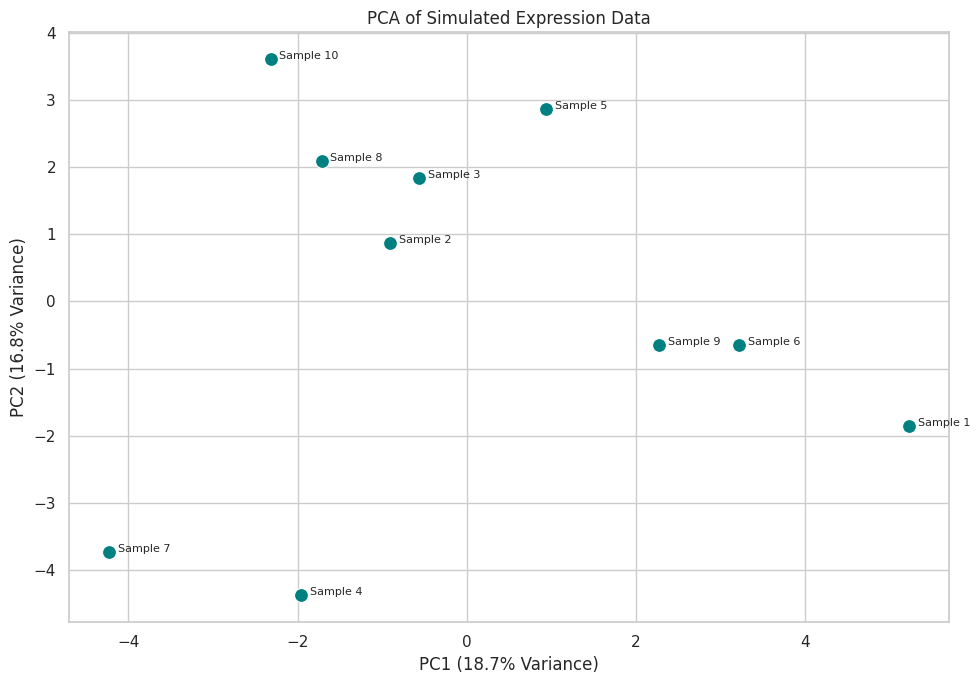

In [18]:
# -------------------- PCA Plot -------------------- #
scaler = StandardScaler()
X_scaled = scaler.fit_transform(expression_df)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_df['Sample'] = expression_df.index

# Plot PCA result
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', s=100, color='teal')
for i in range(len(pca_df)):
    plt.text(pca_df['PC1'][i] + 0.1, pca_df['PC2'][i], pca_df['Sample'][i], fontsize=8)
plt.title("PCA of Simulated Expression Data")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(expression_df)

# PCA with 3 components
pca = PCA(n_components=3)
components = pca.fit_transform(X_scaled)

# DataFrame for plotting
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Sample'] = expression_df.index

# Plot with Plotly
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3',
    text='Sample',
    color='Sample',
    title="3D PCA of Simulated Expression Data",
    width=800, height=600
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(showlegend=False)

fig.show()